In [ ]:
#!pip install yfinance
#https://pypi.org/project/yfinance/

In [1]:
import pandas as pd

In [2]:
import yfinance as yf
import datetime as dt

start = dt.datetime(2020,1,1)
end = dt.datetime.now()
btc = yf.Ticker('BTC-USD')
eth = yf.Ticker('ETH-USD')
gold = yf.Ticker('GC=F')

In [3]:
btc_history = btc.history(period="max")
eth_history = eth.history(period="max")
gold_history = gold.history(period='max')

In [4]:
#find the latest start date from the 3 data sets so we can merge into a single complete dataframe
start_dates = [btc_history.index[0], eth_history.index[0], gold_history.index[0]]
max_date = max(start_dates)

data = yf.download("BTC-USD ETH-USD GC=F", start=max_date)

start_dates, max_date

[*********************100%***********************]  3 of 3 completed


([Timestamp('2014-09-17 00:00:00'),
  Timestamp('2017-11-09 00:00:00'),
  Timestamp('2000-08-30 00:00:00')],
 Timestamp('2017-11-09 00:00:00'))

In [5]:
data.head()

Adj Close                                 Close              \
                BTC-USD     ETH-USD         GC=F      BTC-USD     ETH-USD   
Date                                                                        
2017-11-08  7459.689941         NaN  1281.599976  7459.689941         NaN   
2017-11-09  7143.580078  320.884003  1285.599976  7143.580078  320.884003   
2017-11-10  6618.140137  299.252991  1272.400024  6618.140137  299.252991   
2017-11-11  6357.600098  314.681000          NaN  6357.600098  314.681000   
2017-11-12  5950.069824  307.907990          NaN  5950.069824  307.907990   

                                High                                   Low  \
                   GC=F      BTC-USD     ETH-USD         GC=F      BTC-USD   
Date                                                                         
2017-11-08  1281.599976  7776.419922         NaN  1284.900024  7114.020020   
2017-11-09  1285.599976  7446.830078  329.451996  1286.900024  7101.520020   
2017-11-10  1272.400024  7312.000000  324.717987  1283.500000  6436.870117   
2017-11-11          NaN  6873.149902  319.453003          NaN  6204.220215   
2017-11-12          NaN  6625.049805  319.153015          NaN  5519.009766   

                                            Open                           \
               ETH-USD         GC=F      BTC-USD     ETH-USD         GC=F   
Date                                                                        
2017-11-08         NaN  1274.699951  7141.379883         NaN  1275.900024   
2017-11-09  307.056000  1279.699951  7446.830078  308.644989  1279.699951   
2017-11-10  294.541992  1272.400024  7173.729980  320.670990  1283.500000   
2017-11-11  298.191986          NaN  6618.609863  298.585999          NaN   
2017-11-12  298.513000          NaN  6295.450195  314.690002          NaN   

                Volume                      
               BTC-USD       ETH-USD  GC=F  
Date                                        
2017-11-08  4602200064           NaN  15.0  
2017-11-09  3226249984  8.932500e+08  18.0  
2017-11-10  5208249856  8.859860e+08  10.0  
2017-11-11  4908680192  8.423010e+08   NaN  
2017-11-12  8957349888  1.613480e+09   NaN

In [6]:
raw_data = data.copy()

#Gold trading is closed on weekends (Crypto is 24/7), so we need to impute some missing values
#use 'ffill', meaing Friday's close will forward fill Saturday & Sunday
raw_data.fillna(method='ffill', inplace=True)

#collapse the 2 row header into a single row
raw_data.columns = raw_data.columns.map('-'.join)

#rename the columns for easy of access
raw_data.columns = ['BTC-adj_close', 'ETH-adj_close', 'AU-adj_close', 
                'BTC-close', 'ETH-close', 'AU-close', 
                'BTC-high', 'ETH-high', 'AU-high',
                'BTC-low', 'ETH-low', 'AU-low',
                'BTC-open', 'ETH-open', 'AU-open',
                'BTC-volume', 'ETH-volume', 'AU-volume',
                ]

#reorder for readability
raw_data = raw_data[['BTC-open','BTC-low','BTC-high','BTC-close','BTC-adj_close','BTC-volume',
                     'ETH-open','ETH-low','ETH-high','ETH-close','ETH-adj_close','ETH-volume',
                     'AU-open','AU-low','AU-high','AU-close','AU-adj_close','AU-volume']]

raw_data.head()

,BTC-open,BTC-low,BTC-high,BTC-close,BTC-adj_close,BTC-volume,ETH-open,ETH-low,ETH-high,ETH-close,ETH-adj_close,ETH-volume,AU-open,AU-low,AU-high,AU-close,AU-adj_close,AU-volume
Date,,,,,,,,,,,,,,,,,,
2017-11-08,7141.379883,7114.020020,7776.419922,7459.689941,7459.689941,4602200064,NaN,NaN,NaN,NaN,NaN,NaN,1275.900024,1274.699951,1284.900024,1281.599976,1281.599976,15.0
2017-11-09,7446.830078,7101.520020,7446.830078,7143.580078,7143.580078,3226249984,308.644989,307.056000,329.451996,320.884003,320.884003,8.932500e+08,1279.699951,1279.699951,1286.900024,1285.599976,1285.599976,18.0
2017-11-10,7173.729980,6436.870117,7312.000000,6618.140137,6618.140137,5208249856,320.670990,294.541992,324.717987,299.252991,299.252991,8.859860e+08,1283.500000,1272.400024,1283.500000,1272.400024,1272.400024,10.0
2017-11-11,6618.609863,6204.220215,6873.149902,6357.600098,6357.600098,4908680192,298.585999,298.191986,319.453003,314.681000,314.681000,8.423010e+08,1283.500000,1272.400024,1283.500000,1272.400024,1272.400024,10.0
2017-11-12,6295.450195,5519.009766,6625.049805,5950.069824,5950.069824,8957349888,314.690002,298.513000,319.153015,307.907990,307.907990,1.613480e+09,1283.500000,1272.400024,1283.500000,1272.400024,1272.400024,10.0


In [ ]:
#save the raw data file to CSV
#raw_data.to_csv('raw_data.csv')

In [7]:
raw_data.sort_index()

,BTC-open,BTC-low,BTC-high,BTC-close,BTC-adj_close,BTC-volume,ETH-open,ETH-low,ETH-high,ETH-close,ETH-adj_close,ETH-volume,AU-open,AU-low,AU-high,AU-close,AU-adj_close,AU-volume
Date,,,,,,,,,,,,,,,,,,
2017-11-08,7141.379883,7114.020020,7776.419922,7459.689941,7459.689941,4602200064,NaN,NaN,NaN,NaN,NaN,NaN,1275.900024,1274.699951,1284.900024,1281.599976,1281.599976,15.0
2017-11-09,7446.830078,7101.520020,7446.830078,7143.580078,7143.580078,3226249984,308.644989,307.056000,329.451996,320.884003,320.884003,8.932500e+08,1279.699951,1279.699951,1286.900024,1285.599976,1285.599976,18.0
2017-11-10,7173.729980,6436.870117,7312.000000,6618.140137,6618.140137,5208249856,320.670990,294.541992,324.717987,299.252991,299.252991,8.859860e+08,1283.500000,1272.400024,1283.500000,1272.400024,1272.400024,10.0
2017-11-11,6618.609863,6204.220215,6873.149902,6357.600098,6357.600098,4908680192,298.585999,298.191986,319.453003,314.681000,314.681000,8.423010e+08,1283.500000,1272.400024,1283.500000,1272.400024,1272.400024,10.0
2017-11-12,6295.450195,5519.009766,6625.049805,5950.069824,5950.069824,8957349888,314.690002,298.513000,319.153015,307.907990,307.907990,1.613480e+09,1283.500000,1272.400024,1283.500000,1272.400024,1272.400024,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-09,19328.140625,19310.962891,21439.410156,21381.152344,21381.152344,48469528171,1635.187744,1632.836548,1735.809814,1719.085449,1719.085449,2.024232e+10,1719.199951,1712.800049,1720.000000,1716.199951,1716.199951,635.0
2022-09-10,21376.912109,21168.722656,21760.275391,21680.539062,21680.539062,36913738894,1718.961304,1710.296997,1784.497803,1776.203735,1776.203735,1.313093e+10,1719.199951,1712.800049,1720.000000,1716.199951,1716.199951,635.0
2022-09-11,21678.542969,21406.945312,21770.552734,21769.255859,21769.255859,34493951963,1775.976074,1730.164795,1782.729858,1761.800049,1761.800049,1.246430e+10,1719.199951,1712.800049,1720.000000,1716.199951,1716.199951,635.0


In [8]:
raw_data.fillna(0)

,BTC-open,BTC-low,BTC-high,BTC-close,BTC-adj_close,BTC-volume,ETH-open,ETH-low,ETH-high,ETH-close,ETH-adj_close,ETH-volume,AU-open,AU-low,AU-high,AU-close,AU-adj_close,AU-volume
Date,,,,,,,,,,,,,,,,,,
2017-11-08,7141.379883,7114.020020,7776.419922,7459.689941,7459.689941,4602200064,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1275.900024,1274.699951,1284.900024,1281.599976,1281.599976,15.0
2017-11-09,7446.830078,7101.520020,7446.830078,7143.580078,7143.580078,3226249984,308.644989,307.056000,329.451996,320.884003,320.884003,8.932500e+08,1279.699951,1279.699951,1286.900024,1285.599976,1285.599976,18.0
2017-11-10,7173.729980,6436.870117,7312.000000,6618.140137,6618.140137,5208249856,320.670990,294.541992,324.717987,299.252991,299.252991,8.859860e+08,1283.500000,1272.400024,1283.500000,1272.400024,1272.400024,10.0
2017-11-11,6618.609863,6204.220215,6873.149902,6357.600098,6357.600098,4908680192,298.585999,298.191986,319.453003,314.681000,314.681000,8.423010e+08,1283.500000,1272.400024,1283.500000,1272.400024,1272.400024,10.0
2017-11-12,6295.450195,5519.009766,6625.049805,5950.069824,5950.069824,8957349888,314.690002,298.513000,319.153015,307.907990,307.907990,1.613480e+09,1283.500000,1272.400024,1283.500000,1272.400024,1272.400024,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-09,19328.140625,19310.962891,21439.410156,21381.152344,21381.152344,48469528171,1635.187744,1632.836548,1735.809814,1719.085449,1719.085449,2.024232e+10,1719.199951,1712.800049,1720.000000,1716.199951,1716.199951,635.0
2022-09-10,21376.912109,21168.722656,21760.275391,21680.539062,21680.539062,36913738894,1718.961304,1710.296997,1784.497803,1776.203735,1776.203735,1.313093e+10,1719.199951,1712.800049,1720.000000,1716.199951,1716.199951,635.0
2022-09-11,21678.542969,21406.945312,21770.552734,21769.255859,21769.255859,34493951963,1775.976074,1730.164795,1782.729858,1761.800049,1761.800049,1.246430e+10,1719.199951,1712.800049,1720.000000,1716.199951,1716.199951,635.0


# Bitcoin Data

In [11]:
data = btc_history.loc['2017-01-01':]
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2017-01-01,963.658020,1003.080017,958.698975,998.325012,147775008,0,0
2017-01-02,998.617004,1031.390015,996.702026,1021.750000,222184992,0,0
2017-01-03,1021.599976,1044.079956,1021.599976,1043.839966,185168000,0,0
2017-01-04,1044.400024,1159.420044,1044.400024,1154.729980,344945984,0,0
2017-01-05,1156.729980,1191.099976,910.416992,1013.380005,510199008,0,0
...,...,...,...,...,...,...,...
2022-09-09,19328.140625,21439.410156,19310.962891,21381.152344,48469528171,0,0
2022-09-10,21376.912109,21760.275391,21168.722656,21680.539062,36913738894,0,0
2022-09-11,21678.542969,21770.552734,21406.945312,21769.255859,34493951963,0,0


# ARIMA

In [44]:
train_size =0.9

index = round(train_size*data['Close'].shape[0])

data_train = data['Close'].iloc[:index]
data_test = data['Close'].iloc[index:]

In [45]:
len(data_train), len(data_test)

(1873, 208)

## Predict next day

In [16]:
y_pred = data_test.shift(1)
y_pred

Date
2020-12-28             NaN
2020-12-29    27084.808594
2020-12-30    27362.437500
2020-12-31    28840.953125
2021-01-01    29001.720703
                  ...     
2022-09-09    19329.833984
2022-09-10    21381.152344
2022-09-11    21680.539062
2022-09-12    21769.255859
2022-09-13    22370.449219
Name: Close, Length: 625, dtype: float64

In [17]:
from sklearn.metrics import r2_score

y_pred = data_test.shift(1).dropna()
y_true = data_test[1:]

print(f"R2: {r2_score(y_true, y_pred)}")

R2: 0.9816850426285197


## Decomposition

In [18]:
#data_2.Date.diff().value_counts()

data = data.iloc[:-1]

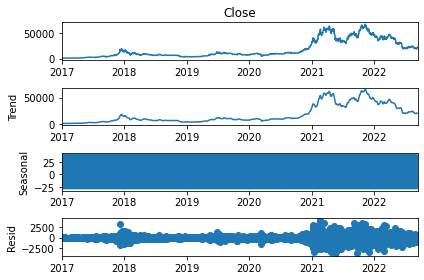

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose

result_add = seasonal_decompose(data['Close'], model='additive')
result_add.plot();

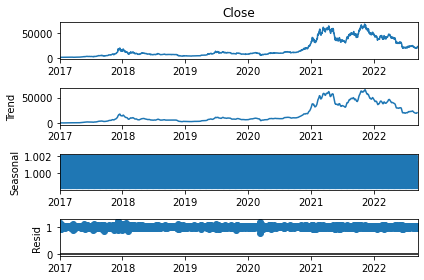

In [20]:
result_mul = seasonal_decompose(data['Close'], model='multiplicative')
result_mul.plot();

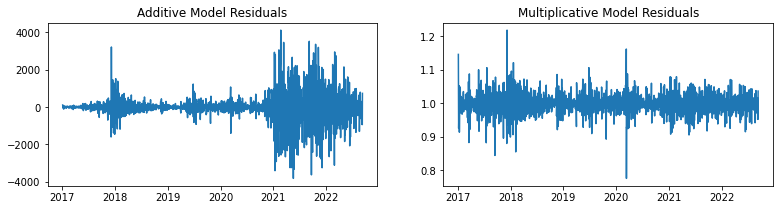

In [21]:
import matplotlib.pyplot as plt
f, (ax1, ax2) = plt.subplots(1,2, figsize=(13,3))
ax1.plot(result_add.resid); ax1.set_title("Additive Model Residuals")
ax2.plot(result_mul.resid); ax2.set_title("Multiplicative Model Residuals");

## Adfuller

In [22]:
from  statsmodels.tsa.stattools import adfuller

adfuller(data.Close)[1]

0.5289257199410394

In [23]:
print('additive resid: ', adfuller(result_add.resid.dropna())[1])
print('multiplicative resid: ', adfuller(result_mul.resid.dropna())[1])

additive resid:  1.676491012776986e-29
multiplicative resid:  3.816917279268034e-27


## ACF and PACF

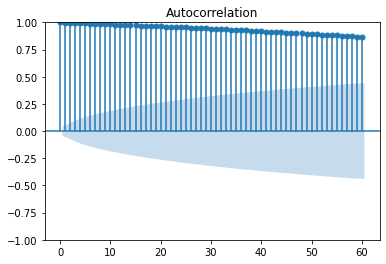

In [24]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data.Close, lags=60)
plt.show()

/Users/invite/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


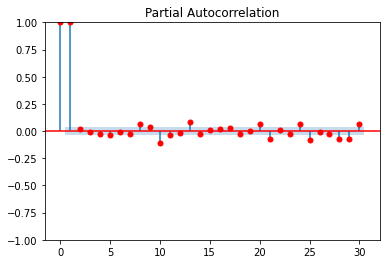

In [25]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(btc_history.Close, lags=30, c='r');

## DIFF

In [26]:
difference_1 = data['Close'].diff()
difference_1

Date
2017-01-01            NaN
2017-01-02      23.424988
2017-01-03      22.089966
2017-01-04     110.890015
2017-01-05    -141.349976
                 ...     
2022-09-08      39.509766
2022-09-09    2051.318359
2022-09-10     299.386719
2022-09-11      88.716797
2022-09-12     601.193359
Name: Close, Length: 2081, dtype: float64

In [27]:
difference_1.diff()

Date
2017-01-01            NaN
2017-01-02            NaN
2017-01-03      -1.335022
2017-01-04      88.800049
2017-01-05    -252.239990
                 ...     
2022-09-08    -413.146484
2022-09-09    2011.808594
2022-09-10   -1751.931641
2022-09-11    -210.669922
2022-09-12     512.476562
Name: Close, Length: 2081, dtype: float64

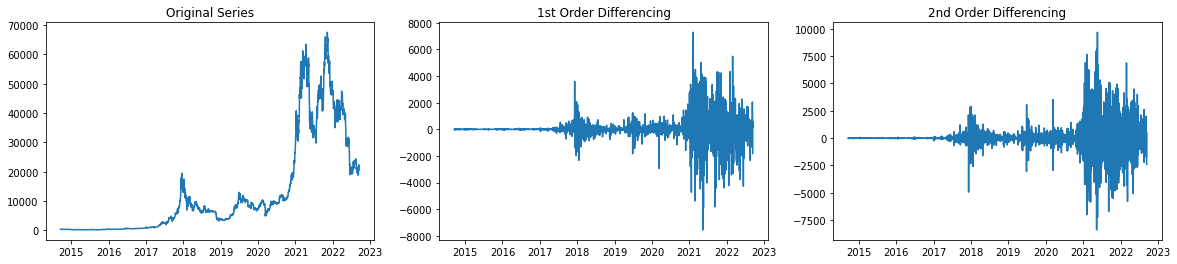

In [28]:
zero_diff = btc_history['Close']
first_order_diff = btc_history['Close'].diff()
second_order_diff = btc_history['Close'].diff(1).diff(1)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,4))
ax1.plot(zero_diff); ax1.set_title('Original Series')
ax2.plot(first_order_diff); ax2.set_title('1st Order Differencing')
ax3.plot(second_order_diff); ax3.set_title('2nd Order Differencing');

## Deseasonalized and Linearized

In [29]:
data['Deseasonalized'] = data.Close.values/result_mul.seasonal

/var/folders/x6/36rt5cz91tsdc2y_c9095w4c0000gp/T/ipykernel_24380/3511641096.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Deseasonalized'] = data.Close.values/result_mul.seasonal


In [30]:
len(data.Close.values), len(result_mul.seasonal)

(2081, 2081)

In [31]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits',
       'Deseasonalized'],
      dtype='object')

/var/folders/x6/36rt5cz91tsdc2y_c9095w4c0000gp/T/ipykernel_24380/133484456.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Linearized'] = np.log(data['Deseasonalized'])


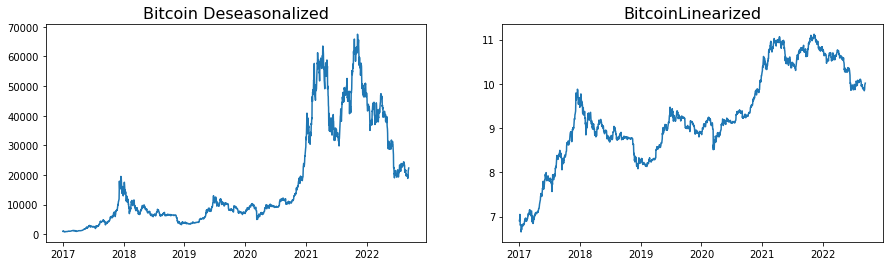

In [32]:
import numpy as np
plt.figure(figsize=(15,4)); plt.subplot(1,2,1); plt.plot(data.Deseasonalized);
plt.title('Bitcoin Deseasonalized', fontsize=16);

# Also remove exponential trend 
data['Linearized'] = np.log(data['Deseasonalized'])

plt.subplot(1,2,2); plt.plot(data['Linearized'])
plt.title('BitcoinLinearized', fontsize=16);

In [33]:
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Deseasonalized,Linearized
Date,,,,,,,,,
2017-01-01,963.658020,1003.080017,958.698975,998.325012,147775008,0,0,1000.039760,6.907795
2017-01-02,998.617004,1031.390015,996.702026,1021.750000,222184992,0,0,1020.507952,6.928056
2017-01-03,1021.599976,1044.079956,1021.599976,1043.839966,185168000,0,0,1043.244378,6.950091
2017-01-04,1044.400024,1159.420044,1044.400024,1154.729980,344945984,0,0,1152.354101,7.049562
2017-01-05,1156.729980,1191.099976,910.416992,1013.380005,510199008,0,0,1014.052133,6.921710
...,...,...,...,...,...,...,...,...,...
2022-09-08,19289.941406,19417.351562,19076.714844,19329.833984,32194477850,0,0,19342.654574,9.870068
2022-09-09,19328.140625,21439.410156,19310.962891,21381.152344,48469528171,0,0,21411.387112,9.971678
2022-09-10,21376.912109,21760.275391,21168.722656,21680.539062,36913738894,0,0,21681.843600,9.984230


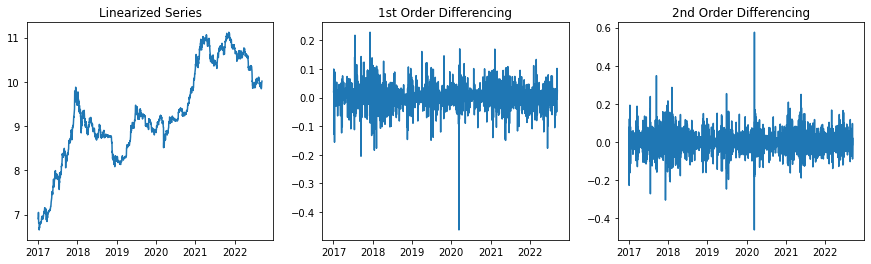

In [34]:
fig, axes = plt.subplots(1, 3,figsize=(15,4))

axes[0].plot(data['Linearized']); axes[0].set_title('Linearized Series')
# 1st Differencing
y_diff = data['Linearized'].diff().dropna()
axes[1].plot(y_diff); axes[1].set_title('1st Order Differencing')

# 2nd Differencing
y_diff_diff = data['Linearized'].diff().diff().dropna()
axes[2].plot(y_diff_diff); axes[2].set_title('2nd Order Differencing');

In [35]:
print('p-value zero-diff: ', adfuller(data['Linearized'])[1])
print('p-value first-diff: ', adfuller(data['Linearized'].diff().dropna())[1])
print('p-value second-diff: ', adfuller(data['Linearized'].diff().diff().dropna())[1])

p-value zero-diff:  0.23850157741413353
p-value first-diff:  0.0
p-value second-diff:  2.920747389660084e-27


In [36]:
from pmdarima.arima.utils import ndiffs
ndiffs(data['Linearized'])

1

/Users/invite/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


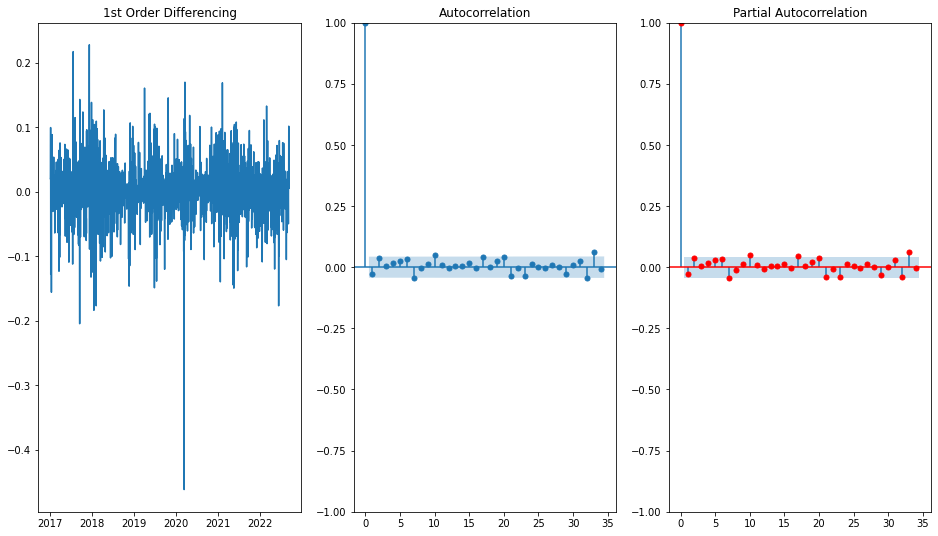

In [37]:
fig, axes = plt.subplots(1,3, figsize=(16,9))
axes[0].plot(y_diff); axes[0].set_title('1st Order Differencing')
plot_acf(y_diff, ax=axes[1]);
plot_pacf(y_diff, ax=axes[2], c='r');

## Train test split

In [48]:
train_size =0.9

index = round(train_size*data['Linearized'].shape[0])

train = data['Linearized'].iloc[:index]
test = data['Linearized'].iloc[index:]

In [49]:
len(train), len(test)

(1873, 208)

## Model

In [50]:
from statsmodels.tsa.arima.model import ARIMA

In [51]:
arima = ARIMA(data['Linearized'], order=(0,1,0),trend='t')
arima = arima.fit()

/Users/invite/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/invite/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/invite/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [52]:
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Linearized   No. Observations:                 2081
Model:                 ARIMA(0, 1, 0)   Log Likelihood                3667.081
Date:                Tue, 13 Sep 2022   AIC                          -7330.161
Time:                        21:07:51   BIC                          -7318.881
Sample:                    01-01-2017   HQIC                         -7326.028
                         - 09-12-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0015      0.001      1.603      0.109      -0.000       0.003
sigma2         0.0017   2.22e-05     77.703      0.000       0.002       0.002
===================================================================================
Ljung-Box (L1) (Q):                   1.47   Jarque-Bera (JB):              9001.11
Prob(Q):                              0.23   Prob(JB):                         0.00
Heteroskedasticity (H):               0.71   Skew:                            -0.70
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [53]:
import pmdarima as pm
smodel = pm.auto_arima(data['Linearized'],
                       start_p=1, max_p=2,
                       start_q=1, max_q=2,
                       trend='t',
                       seasonal=False,
                       trace=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-7326.364, Time=0.60 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-7327.927, Time=0.27 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-7327.273, Time=0.58 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-7327.139, Time=1.23 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-7327.927, Time=0.36 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 3.055 seconds


In [54]:
len(data)

2081

In [56]:
forecast = arima.forecast(len(test), alpha=0.05)
forecast_results = arima.get_forecast(len(test), alpha=0.05)

forecast = forecast_results.predicted_mean
confidence_int = forecast_results.conf_int().values

In [57]:
forecast = forecast_results.predicted_mean
#len(confidence_int)
forecast

2022-09-13    10.015768
2022-09-14    10.017257
2022-09-15    10.018745
2022-09-16    10.020234
2022-09-17    10.021722
                ...    
2023-04-04    10.317936
2023-04-05    10.319425
2023-04-06    10.320913
2023-04-07    10.322402
2023-04-08    10.323890
Freq: D, Name: predicted_mean, Length: 208, dtype: float64

In [58]:
# We define here a "Plot forecast vs. real", which also shows historical training set

def plot_forecast(fc, train, test, upper=None, lower=None):
    is_confidence_int = isinstance(upper, np.ndarray) and isinstance(lower, np.ndarray)
    # Prepare plot series
    fc_series = fc#pd.Series(fc, index=test.index)
    lower_series = pd.Series(upper, index=fc_series.index) if is_confidence_int else None
    upper_series = pd.Series(lower, index=fc_series.index) if is_confidence_int else None

    # Plot
    plt.figure(figsize=(10,4), dpi=100)
    plt.plot(train, label='training', color='black')
    plt.plot(test, label='actual', color='black', ls='--')
    plt.plot(fc_series, label='forecast', color='orange')
    if is_confidence_int:
        plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)
    plt.title('Forecast vs Actuals')
    plt.legend(loc='upper left', fontsize=8);

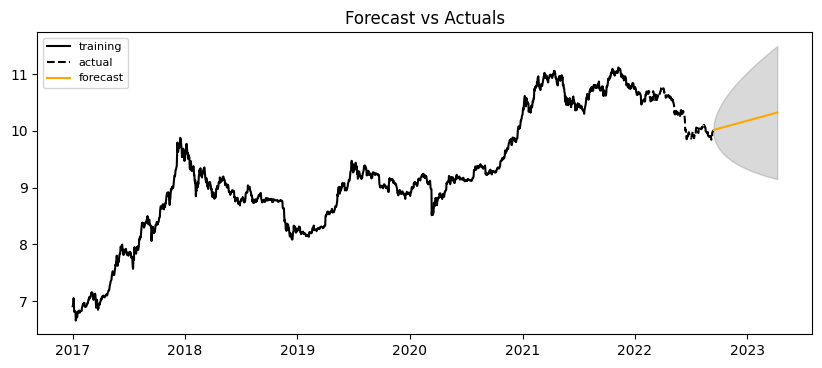

In [59]:
plot_forecast(forecast, train, test, confidence_int[:,0], confidence_int[:,1])

In [60]:
len(result_mul.seasonal), len(train), len(test), len(forecast)

(2081, 1873, 208, 208)

In [62]:
forecast_recons = np.exp(forecast) * result_mul.seasonal#[1900:]
train_recons = np.exp(train) * result_mul.seasonal#[0:1900]
test_recons = np.exp(test) * result_mul.seasonal#[1900:]
lower_recons = np.exp(confidence_int)[:, 0] * result_mul.seasonal#[1900:]
upper_recons = np.exp(confidence_int)[:, 1] * result_mul.seasonal#[1900:]

# Plot
plot_forecast(forecast_recons, train_recons, test_recons, lower_recons.values, upper_recons.values)

ValueError: operands could not be broadcast together with shapes (208,) (2081,) 

In [ ]:
residuals = pd.DataFrame(arima.resid)

fig, ax = plt.subplots(1,2, figsize=(16,3))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1]);

# SARIMA

In [ ]:
data.head()

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(18,8))
# keeping just log transform to stay ~ linear
data['log'] = np.log(data.Close)

# linearized series
axs[0,0].plot(data.log); axs[0,0].set_title('linearized Series')

# Normal differencing
axs[0,1].plot(data.log.diff(1)); axs[0,1].set_title('1st Order Differencing')

# Seasonal differencing
axs[1,0].plot(data.log.diff(12))
axs[1,0].set_title('Seasonal differencing of period 12')

# Sesonal + Normal differencing
axs[1,1].plot(data.log.diff(12).diff(1))
axs[1,1].set_title('First order diff of seasonal differencing 12');

## Split Train/Test

In [ ]:
train = data.log[0:1900]
test = data.log[1900:]

## Grid search

In [ ]:
smodel = pm.auto_arima(train, seasonal=True, m=12, 
                       start_p=0, max_p=1, max_d=1, start_q=0, max_q=1,
                       start_P=0, max_P=2, max_D=1, start_Q=0, max_Q=2, 
                       trace=True, error_action='ignore', suppress_warnings=True)

## Model

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarima = SARIMAX(train, order=(0,1,0), seasonal_order=(0,0,0,12))
sarima = sarima.fit()

results = sarima.get_forecast(len(test), alpha=0.05)
forecast = results.predicted_mean
confidence_int = results.conf_int()

In [ ]:
forecast_recons = pd.Series(np.exp(forecast), index=test.index)
lower_recons = np.exp(confidence_int['lower log']).values
upper_recons = np.exp(confidence_int['upper log']).values

plot_forecast(forecast_recons, np.exp(train), np.exp(test), upper = upper_recons, lower=lower_recons)

In [ ]:
sarima.summary()

# Train

In [64]:
import requests

response = requests.get('https://www.comitedesgaleriesdart.com/galeries/')

In [65]:
response

<Response [200]>